# 動機
レイ曲線なる概念を知った。

[L・ランダル・レイ発案「レイ曲線」のご紹介](https://www.notion.so/L-0ef18e98e5ca47a1a14c139ac4844e02?pvs=21) 

自分にとってはどうも何が言いたいのかわかりにくくて、レイ氏にありがちなわかりにくさなのか、翻訳で分かりにくくなっているのか、自分の理解が根本的に間違っている部分があるのか、よくわからかった。そこで、定量的な表現が可能なSFCモデルに翻訳できないか試そうと思いたった。それっぽいモデルを作って、税率の変化に対して債務対GDP比率とGDP成長率の関係がどう変わるのか、プロットしてみる。

モデルでは政府支出を外生変数として与える。日本のような自国通貨を発行する国は特に、税収との割合に依存せずに政府の支出を決めている、と考えるのが自然だと私は思っている。気にはしてるだろうけど。

# モデルの紹介
## 取引フロー表

|            | 家計   | 企業(経常) | 企業(資本) | 政府  | 合計 |
| ---------- | ------ | ---------- | ---------- | ----- | ---- |
| 消費       | $-C$   | $+C$       |            |       | $0$  |
| 投資       |        | $+I$       | $-I$       |       | $0$  |
| 政府支出   |        | $+G$       |            | $-G$  | $0$  |
| 賃金       | $+W$   | $-W$       |            |       | $0$  |
| 税         | $-T$   |            |            | $+T$  | $0$  |
| 利潤       | $+P_h$ | $-P$       | $+Pf$      |       | $0$  |
| 貨幣の変化 | $-ΔH$  |            |            | $+ΔH$ | $0$  |
| 合計       | $0$    | $0$        | $0$        | $0$   |      |

## モデルの式一覧
計算する順番に並べている

$G=G_0\exp(\delta t)$

$C=(1-\epsilon)(W+\alpha_1P_h)+\alpha_2H_{-1}$

$I=\max\{0, \gamma_1K_{-1}+(C+G-\gamma_2K_{-1})\}=\max\{0, C+G+(\gamma_1-\gamma_2)K_{-1}\}$

$W=\beta(C+G)$

$P=C+G+I-W$

$P_f=I$

$P_h=P-P_f$

$T=\epsilon(W+P_h)$

$\Delta H=G-T$

$\Delta K=I-\gamma_1K_{-1}$

$H=H_{-1}+\Delta H$

$K=K_{-1}+\Delta K$

## 初期値の設定

$H_{(t=0)}, K_{(t=0)} = H_0, K_0$

ただし、$G_0>(\gamma_2-\gamma_1)K_0$になるように設定する

$\Delta K_{(t=0)}=I_{(t=0)}-\gamma_1\{K_0-\Delta K_{(t=0)}\}$

$\Delta K_{(t=0)}=\frac{1}{1-\gamma_1}\{I_{(t=0)}-\gamma_1K_0\}$

$\Delta H_{(t=0)}=G_{(t=0)}-T_{(t=0)}$

$G_{(t=0)}=G_0$

$I_{(t=0)}=C_{(t=0)}+G_{(t=0)}+(\gamma_1-\gamma_2)\{K_0-\Delta K_{(t=0)}\}$

$=C_{(t=0)}+G_0+(\gamma_1-\gamma_2)[K_0-\frac{1}{1-\gamma_1}\{I_{(t=0)}-\gamma_1K_0\}]$

$\frac{1-\gamma_2}{1-\gamma_1}I_{(t=0)}=C_{(t=0)}+G_0+\frac{\gamma_1-\gamma_2}{1-\gamma_1}K_0$

$I_{(t=0)}=\frac{1-\gamma_1}{1-\gamma_2}C_{(t=0)}+\frac{1-\gamma_1}{1-\gamma_2}G_0+\frac{\gamma_1-\gamma_2}{1-\gamma_2}K_0$

$W_{(t=0)}=\beta\{C_{(t=0)}+G_0\}$

$P_{(t=0)}=C_{(t=0)}+G_{(t=0)}+I_{(t=0)}-W_{(t=0)}$

$=C_{(t=0)}+G_0+\frac{1-\gamma_1}{1-\gamma_2}C_{(t=0)}+\frac{1-\gamma_1}{1-\gamma_2}G_0+\frac{\gamma_1-\gamma_2}{1-\gamma_2}K_0-\beta\{C_{(t=0)}+G_0\}$

$=(1-\beta+\frac{1-\gamma_1}{1-\gamma_2})G_0+(1-\beta+\frac{1-\gamma_1}{1-\gamma_2})C_{(t=0)}+\frac{\gamma_1-\gamma_2}{1-\gamma_2}K_0$

$P_{f(t=0)}=I_{(t=0)}=\frac{1-\gamma_1}{1-\gamma_2}C_{(t=0)}+\frac{1-\gamma_1}{1-\gamma_2}G_0+\frac{\gamma_1-\gamma_2}{1-\gamma_2}K_0$

$P_{h(t=0)}=P-P_{f(t=0)}=C_{(t=0)}+G_{(t=0)}-W_{(t=0)}$

$=C_{(t=0)}+G_0-\beta\{C_{(t=0)}+G_0\}$

$=(1-\beta)\{C_{(t=0)}+G_0\}$

$T_{(t=0)}=\epsilon\{W_{(t=0)}+P_{h(t=0)}\}$

$=\epsilon[\beta\{C_{(t=0)}+G_0\}+(1-\beta)\{C_{(t=0)}+G_0\}]$

$=\epsilon\{C_{(t=0)}+G_0\}$

$\Delta H_{(t=0)}=G_{(t=0)}-T_{(t=0)}$

$=G_0-\epsilon\{C_{(t=0)}+G_0\}$

$=(1-\epsilon)G_0-\epsilon C_{(t=0)}$

$C_{(t=0)}=(1-\epsilon)\{W_{(t=0)}+\alpha_1P_{h(t=0)}\}+\alpha_2\{H_0-\Delta H_{(t=0)}\}$

$=(1-\epsilon)[\beta\{C_{(t=0)}+G_0\}+\alpha_1(1-\beta)\{C_{(t=0)}+G_0\}]+\alpha_2\{H_0-(1-\epsilon)G_0+\epsilon C_{(t=0)}\}$

$=(1-\alpha_2)(1-\epsilon)G_0+(1-\epsilon+\alpha_2\epsilon)C_{(t=0)}+\alpha_2H_0$

$(\epsilon-\alpha_2\epsilon)C_{(t=0)}=(1-\alpha_2)(1-\epsilon)G_0+\alpha_2H_0$

$C_{(t=0)}=\frac{1-\epsilon}{\epsilon}G_0+\frac{\alpha_2}{\epsilon(1-\alpha_2)}H_0$

# モデルの実装
コードはJuliaで書いた

In [1]:
using StatsPlots

TIME = 1000
α1, α2, β, γ1, γ2, δ, ϵ = 0.5, 0.05, 0.7, 0.05, 0.8, 0.005, 0.3
C, I, G, W, P, Pf, Ph, T = zeros(TIME), zeros(TIME), zeros(TIME), zeros(TIME), zeros(TIME), zeros(TIME), zeros(TIME), zeros(TIME)
ΔH, ΔK, H, K = zeros(TIME), zeros(TIME), zeros(TIME), zeros(TIME)
G0, K0, H0 = 1.0, 1.0, 1.0
G, K[1], H[1], C[1] = G0.*exp.(δ.*(0:(TIME-1))), K0, H0, (1-ϵ)/ϵ*G0+α2*H0
T[1] = ϵ*(C[1]+G0)
Ph[1] = (1 - β)*(C[1]+G0)
Pf[1] = (1-γ1)/(1-γ2)*(C[1]+G0)+(γ1-γ2)/(1-γ2)*K0
I[1] = Pf[1]
P[1] = Pf[1] + Ph[1]
W[1] = β*(C[1]+G0)
ΔH[1] = G0-T[1]
ΔK[1] = 1/(1 - γ1)*(I[1] - γ1*K0);

In [2]:
function run(ϵ, G)
    for t=2:TIME
        C[t] = (1 - ϵ)*(W[t-1] + α1*Ph[t-1]) + α2*H[t-1]
        I[t] = max(0, C[t] + G[t] + (γ1 - γ2)*K[t-1])
        W[t] = β*(C[t] + G[t])
        P[t] = C[t] + G[t] + I[t] - W[t]
        Pf[t] = I[t]
        Ph[t] = P[t] - Pf[t]
        T[t] = ϵ*(W[t] + Ph[t])
        ΔH[t] = G[t] - T[t]
        ΔK[t] = I[t] - γ1*K[t-1]
        H[t] = H[t-1] + ΔH[t]
        K[t] = K[t-1] + ΔK[t]
    end
end
run(ϵ, G)

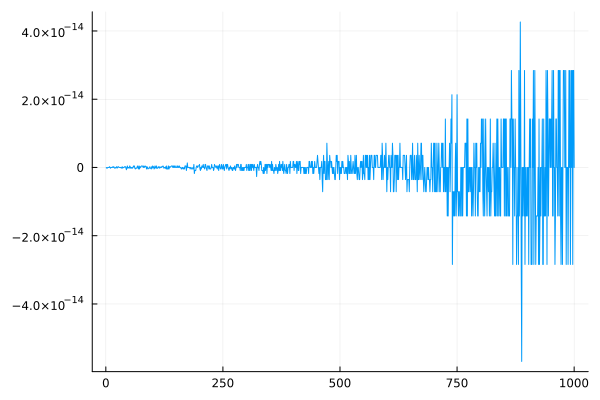

In [3]:
plot(-C+W-T+Ph-ΔH, label=nothing)

hidden equationでモデルのフローの一貫性が満たされていることを確認できる

# 税率変化の長期の影響
長期の影響を算出するにあたり、1000期を回すことで長期均衡の近似値を計算した。近似値だから、ほとんど一定で推移しているのにグラフ上であたかも大きな変化が起きているかのように見えることがある。グラフの軸の値に注意

まずはグラフプロットに必要な計算をすます

In [4]:
ϵ_min, ϵ_max = 0.01, 0.99
step = 0.02
N = length(ϵ_min:step:ϵ_max)
HpY, g, T_end = zeros(N), zeros(N), zeros(N)
function run2(δ)
    G = G0.*exp.(δ.*(0:(TIME-1)))
    for (i, ϵ) in enumerate(ϵ_min:step:ϵ_max)
        run(ϵ, G)
        HpY[i] = H[end]/(C+G+I)[end]
        g[i] = ((C+G+I)[end]-(C+G+I)[end-1])/(C+G+I)[end-1]
        T_end[i] = T[end]
    end
end
run2(0.005)

### 税率と税収の関係

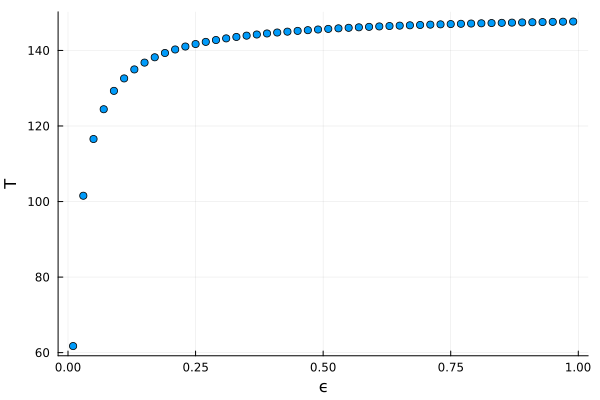

In [5]:
scatter(ϵ_min:step:ϵ_max, T_end, label=nothing, xlabel="ϵ", ylabel="T")

### 税率と成長率の関係

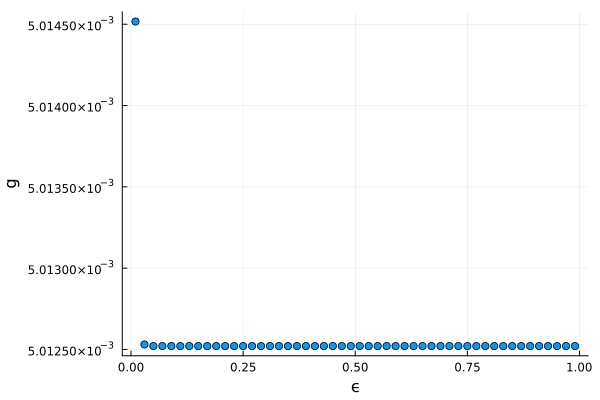

In [6]:
scatter(ϵ_min:step:ϵ_max, g, label=nothing, xlabel="ϵ", ylabel="g")

### 税率と債務残高対GDP比率の関係

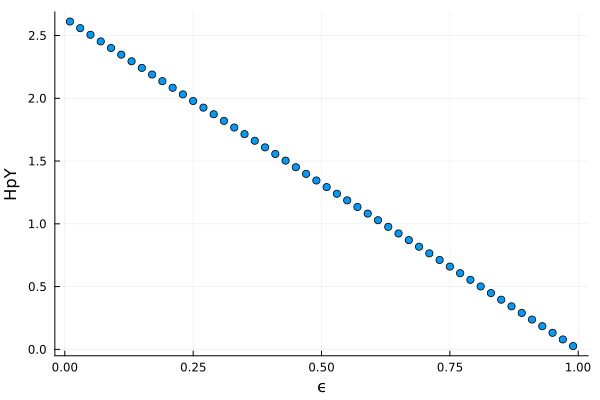

In [7]:
scatter(ϵ_min:step:ϵ_max, HpY, label=nothing, xlabel="ϵ", ylabel="HpY")

### 成長率と債務残高対GDP比率の関係
左下ほど $\epsilon$ が大きい

$g$ はほぼ一定と考えてよい。時間とともに $g \rightarrow \exp(\delta)-1$ になる

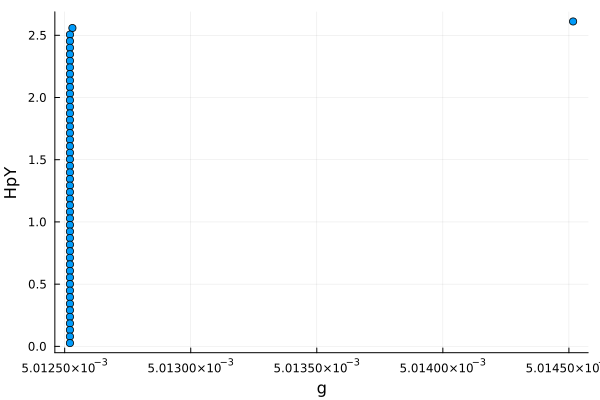

In [8]:
scatter(g, HpY, label=nothing, xlabel="g", ylabel="HpY")

# 税率変化の短期の影響
とりあえず必要な計算をすます

In [9]:
function run3(ϵ1, G)
    for t=2:TIME
        if t >= TIME-2
            C[t] = (1 - ϵ1)*(W[t-1] + α1*Ph[t-1]) + α2*H[t-1]
        else
            C[t] = (1 - ϵ)*(W[t-1] + α1*Ph[t-1]) + α2*H[t-1]
        end
        I[t] = max(0, C[t] + G[t] + (γ1 - γ2)*K[t-1])
        W[t] = β*(C[t] + G[t])
        P[t] = C[t] + G[t] + I[t] - W[t]
        Pf[t] = I[t]
        Ph[t] = P[t] - Pf[t]
        if t >= TIME-3
            T[t] = ϵ1*(W[t] + Ph[t])
        else
            T[t] = ϵ*(W[t] + Ph[t])
        end
        ΔH[t] = G[t] - T[t]
        ΔK[t] = I[t] - γ1*K[t-1]
        H[t] = H[t-1] + ΔH[t]
        K[t] = K[t-1] + ΔK[t]
    end
end

ϵ1s = 0.01:0.02:0.99
δ, ϵ = 0.005, 0.3
N = length(ϵ1s)
ΔT1, ΔT2, ΔT4 = zeros(N), zeros(N), zeros(N)
Δϵ = ϵ1s .- ϵ
ΔHpY1, ΔHpY2, ΔHpY4, Δg1, Δg2, Δg4 = zeros(N), zeros(N), zeros(N), zeros(N), zeros(N), zeros(N)
for (i, ϵ1) in enumerate(ϵ1s)
    G = G0.*exp.(δ.*(0:(TIME-1)))
    run3(ϵ1, G)
    ΔT1[i], ΔT2[i], ΔT4[i] = T[end-3]-exp(δ)*T[end-4], T[end-2]-exp(2δ)*T[end-4], T[end]-exp(4δ)*T[end-4]
    gc, HpYc = ((C+I+G)[end-4]-(C+I+G)[end-5])/(C+I+G)[end-5], H[end-4]/(C+I+G)[end-4]
    ΔHpY1[i] = H[end-3]/(C+I+G)[end-3] - HpYc
    ΔHpY2[i] = H[end-2]/(C+I+G)[end-2] - HpYc
    ΔHpY4[i] = H[end]/(C+I+G)[end] - HpYc
    Δg1[i] = ((C+I+G)[end-3]-(C+I+G)[end-4])/(C+I+G)[end-4] - gc
    Δg2[i] = ((C+I+G)[end-2]-(C+I+G)[end-4])/(C+I+G)[end-4] - ((1+gc)^2 - 1)
    Δg4[i] = ((C+I+G)[end]-(C+I+G)[end-4])/(C+I+G)[end] - ((1+gc)^4 - 1)
end

## 税率変化当期の変化

### 税率の変化と税収の変化の関係

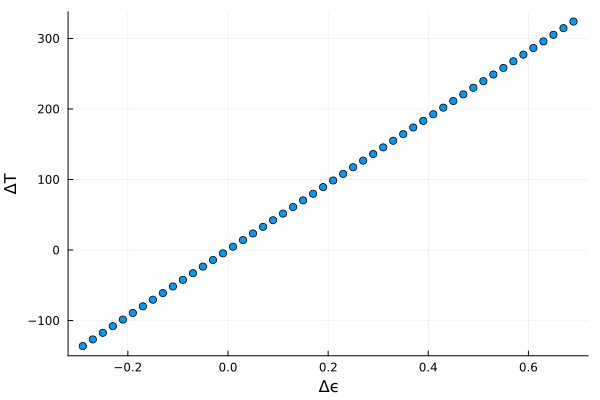

In [10]:
scatter(Δϵ, ΔT1, label=nothing, xlabel="Δϵ", ylabel="ΔT")

### 税率の変化と成長率の変化の関係

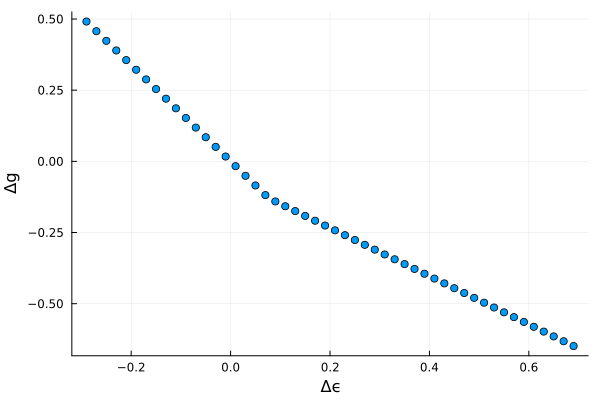

In [11]:
scatter(Δϵ, Δg2, label=nothing, xlabel="Δϵ", ylabel="Δg")

### 税率の変化と債務残高対GDP比率の変化の関係

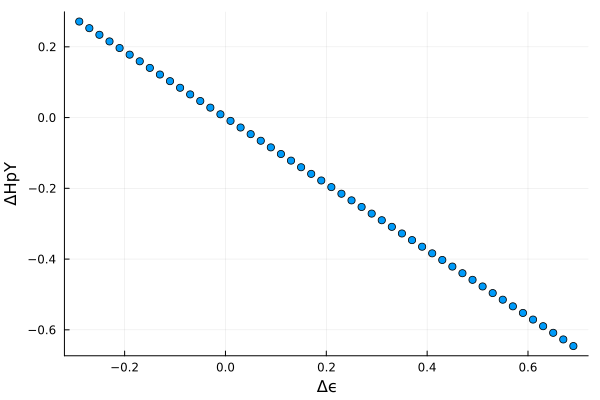

In [12]:
scatter(Δϵ, ΔHpY1, label=nothing, xlabel="Δϵ", ylabel="ΔHpY")

### 成長率の変化と債務残高対GDP比率の変化の関係
税率が上がった期は、税収と貨幣の変化に影響を与える。政府債務残高対GDP比率も反応する。しかし消費や投資は貨幣残高に反応して次の期からしか反応しない。政府支出も外生変数だから反応しない。GDP=C+G+Iは税率が上がった期には反応しない。だからGDP成長率も税率が上がった期には反応しない。

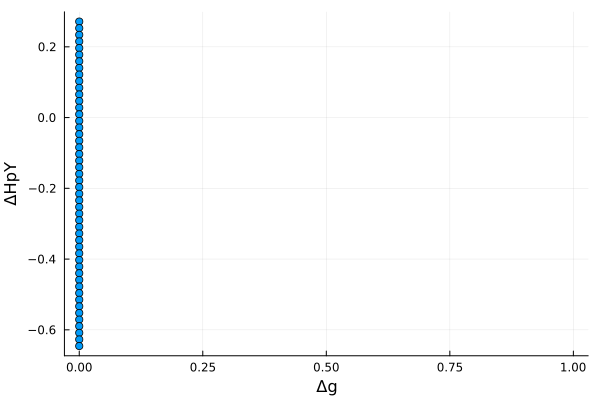

In [13]:
scatter(Δg1, ΔHpY1, label=nothing, xlabel="Δg", ylabel="ΔHpY")

## 税率変化の次期までの変化

### 税率の変化と税収の変化の関係

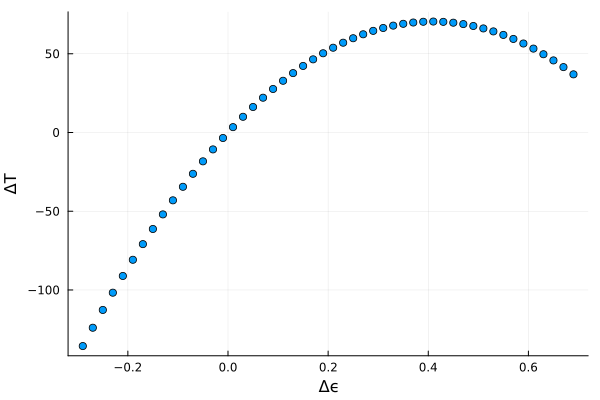

In [14]:
scatter(Δϵ, ΔT2, label=nothing, xlabel="Δϵ", ylabel="ΔT")

### 税率の変化と成長率の変化の関係

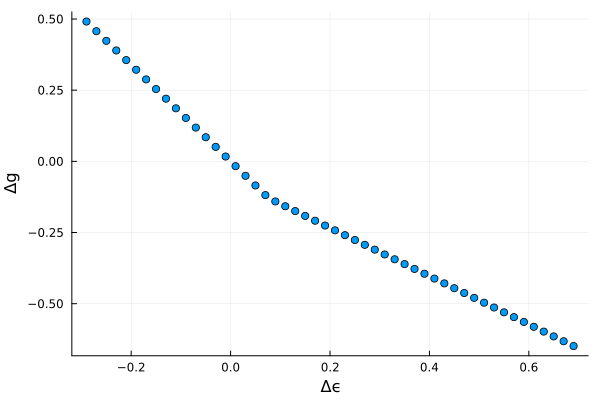

In [15]:
scatter(Δϵ, Δg2, label=nothing, xlabel="Δϵ", ylabel="Δg")

### 税率の変化と債務残高対GDP比率の変化の関係

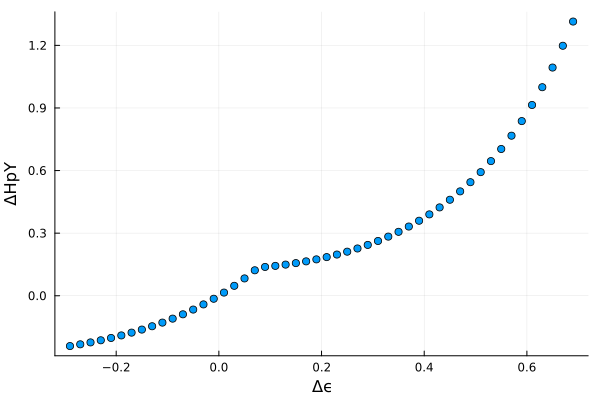

In [16]:
scatter(Δϵ, ΔHpY2, label=nothing, xlabel="Δϵ", ylabel="ΔHpY")

### 成長率の変化と債務残高対GDP比率の変化の関係

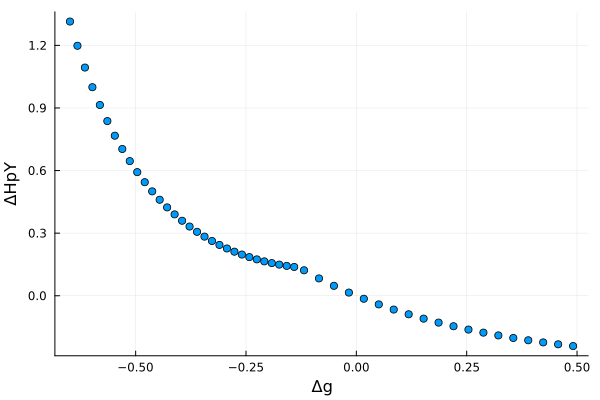

In [17]:
scatter(Δg2, ΔHpY2, label=nothing, xlabel="Δg", ylabel="ΔHpY")

## 税率変化後4期目までの変化

### 税率の変化と税収の変化の関係

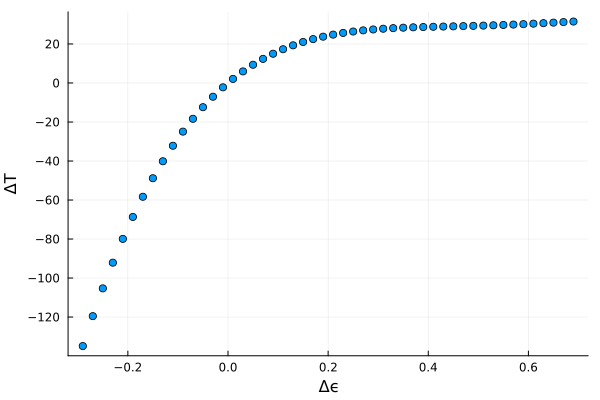

In [18]:
scatter(Δϵ, ΔT4, label=nothing, xlabel="Δϵ", ylabel="ΔT")

### 税率の変化と成長率の変化の関係

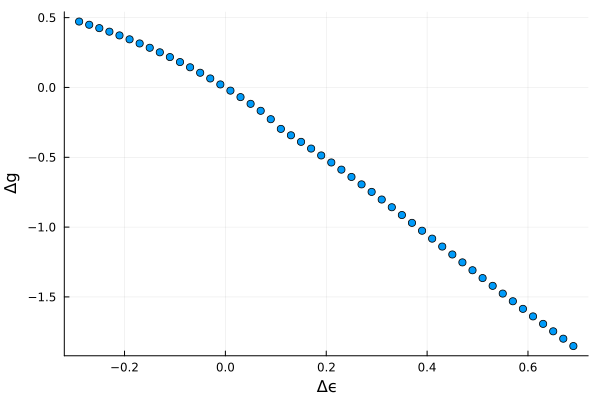

In [19]:
scatter(Δϵ, Δg4, label=nothing, xlabel="Δϵ", ylabel="Δg")

### 税率の変化と債務残高対GDP比率の変化の関係

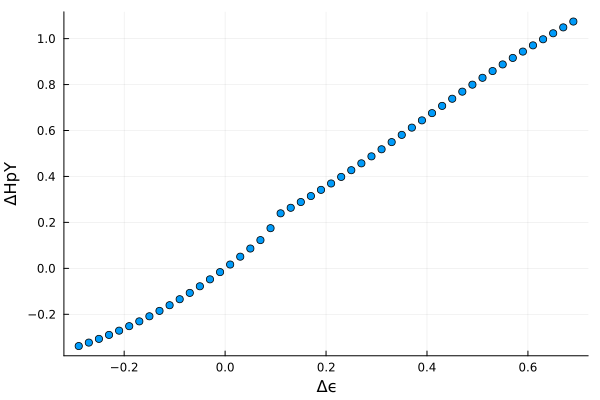

In [20]:
scatter(Δϵ, ΔHpY4, label=nothing, xlabel="Δϵ", ylabel="ΔHpY")

### 成長率の変化と債務残高対GDP比率の変化の関係

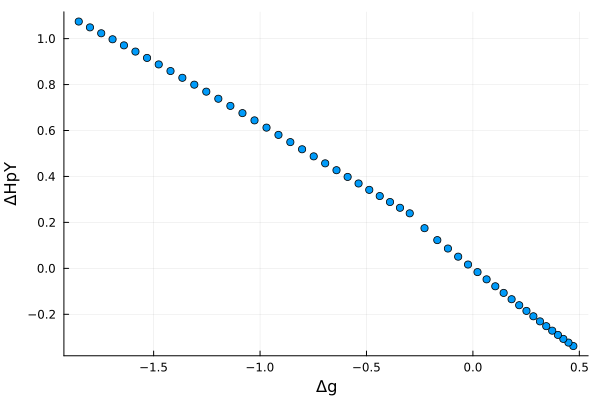

In [21]:
scatter(Δg4, ΔHpY4, label=nothing, xlabel="Δg", ylabel="ΔHpY")

# 結論
政府支出が外生的に与えられるなどの前提条件の下ではあるが、上の結果から、
- 税率が変わってすぐのときは、税率が上がったときほど債務残高対GDP比率が上昇していく。税率が変わってから長時間経ているときは逆に、税率が高いほど債務残高対GDP比率は低い
- 税率が変わってすぐのときは、税率が上がったときほど成長率が下がる。税率が変わってから長時間経ているときは、成長率は税率に関係なく政府支出成長率に収束していく
- 長期でも短期でも、税率の上昇は税収を増やす

ことがわかる。この3点を税率変化と期間で整理すると、
- 短期的には
  - 税率上昇によって
    - 税収が増える
    - 成長率が下がる
    - 債務残高対GDP比率が上がる
  - 税率下降によって
    - 税収が減る
    - 成長率が上がる
    - 債務残高対GDP比率が下がる
- 長期的には
  - 税率上昇によって
    - 政府支出と税収が概ね比例する。そのうえで、政府支出が増加するときは税収増加傾向がある
    - 成長率は政府支出の増加率と同じ水準に収束する
    - 債務残高対GDP比率は下がる
  - 税率下降によって
    - 政府支出と税収が概ね比例する。そのうえで、政府支出が増加するときは税収減少傾向がある
    - 成長率は政府支出の増加率と同じ水準に収束する
    - 債務残高対GDP比率は上がる

といった具合。ただこれも、$\delta$を変えて政府支出増加率を操作すると、多少の性質の変化が現れる。例えば、政府支出が一定で変わらない条件とすると、長期的な性質が当てはまるまでに必要な時間が増える傾向がある。詳しくはfigsの下にグラフを書いておいてある

レイ曲線は再現されなかった。税率が下がったとき、消費や投資に影響が出るとすぐに債務残高対GDP比率が下がり、時間をかけて逆に上がっていった。つまりこのモデルの性質は、「短期的には、レイ曲線の代わりに、横軸＝成長率と縦軸＝債務残高対GDP比率が負の関係になる曲線がある。均衡点がこの曲線上で高成長率側に移動する（減税を意味する）と、時間をかけて曲線そのものが左上にシフトする。その結果最終的に、均衡点は税率が変化する前の位置の上方向に移動する。均衡点がこの曲線上で低成長側に移動する（増税を意味する）と、時間をかけて曲線そのものが下にシフトする。その結果最終的に、均衡点は税率が変化する前の位置の下方向に移動する。」ことを意味する

ラッファー曲線は、少なくとも今回の条件下では、短期的な差分に一瞬それっぽいものが現れた（税率変化の次期までの変化だけに、ラッファー曲線に近いものが現れた）。ただし、少なくともこのモデルでは、税率を0.3から0.7以上に挙げるような急激な変化がなければ無視できる。